In [1]:
%cd ..

/home/dawood/Workspace/face-keypoints


In [2]:
import cv2
import torch

from data.ls3d import LS3D
from models import HRFPN34 as Model

from torch.nn import functional as F
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
data = LS3D('/home/dawood/Datasets/LS3D-W/Menpo-3D/', augment=False)

In [17]:
model = Model(68).cuda()
model.load_state_dict(torch.load('/home/dawood/Experiments/face-keypoint8dfd400ae671409780efe2af8f194948/model_best_loss.weights')['state_dict'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


CPU times: user 11 ms, sys: 0 ns, total: 11 ms
Wall time: 21.3 ms


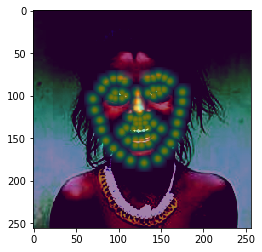

In [18]:
%time img, hm_gt = data[0]
plt.imshow(img.permute(1,2,0).contiguous().numpy())
plt.imshow(hm_gt[:68].max(0)[0].numpy(), alpha=0.5)

In [19]:
preds = model(img.unsqueeze(0).cuda())

In [20]:
preds[-1][0][:68].shape

torch.Size([68, 64, 64])

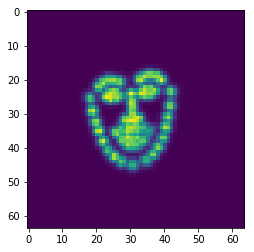

In [21]:
plt.imshow(preds[-1][0, :68].max(0)[0].cpu().detach().numpy())

In [9]:
model.calc_loss(preds, hm_gt.unsqueeze(0).cuda(), mask.unsqueeze(0).cuda())

NameError: name 'mask' is not defined

In [ ]:
mask.sum()